# Long x Short

In [8]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

### Carteira de ações

In [3]:
tickers = ['ITUB4.SA', 'ABEV3.SA', 'USIM5.SA', 'FLRY3.SA', 
           'PSSA3.SA', 'TIET4.SA', 'LEVE3.SA', 'WHRL3.SA',
           'AMZN', 'M', 'LB', 'IAU']

### Calculando a variação diária de cada ação da carteira

In [6]:
prices = pd.DataFrame()

for b in tickers:
    prices[b] = prices[b] = web.DataReader(b, ds_yahoo, start, end)['Adj Close']

log_returns = np.log(prices / prices.shift(1))
correlacao = log_returns.corr()

### Mapa de calor

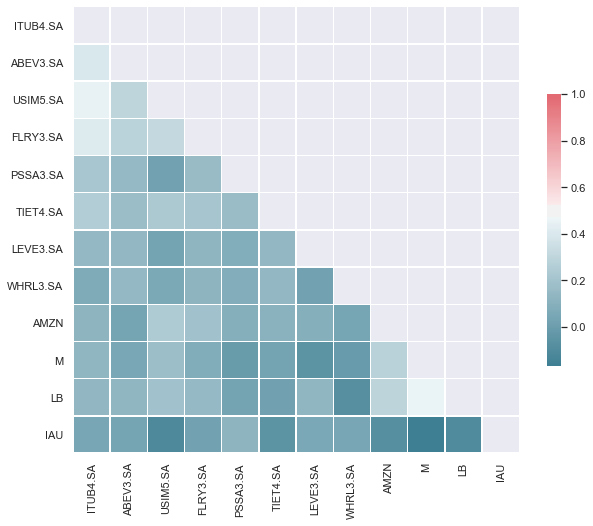

In [20]:
sns.set()

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(correlacao, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Tabela de correlação

In [19]:
correlacao

,ITUB4.SA,ABEV3.SA,USIM5.SA,FLRY3.SA,PSSA3.SA,TIET4.SA,LEVE3.SA,WHRL3.SA,AMZN,M,LB,IAU
ITUB4.SA,1.000000,0.394935,0.451030,0.415259,0.217720,0.258559,0.149749,0.074299,0.122753,0.137936,0.141999,0.046361
ABEV3.SA,0.394935,1.000000,0.300677,0.285484,0.156865,0.169826,0.144947,0.148868,0.037374,0.052021,0.131331,0.034321
USIM5.SA,0.451030,0.300677,1.000000,0.316338,0.023768,0.232162,0.031871,0.060437,0.241732,0.172026,0.195345,-0.108113
FLRY3.SA,0.415259,0.285484,0.316338,1.000000,0.157127,0.213385,0.127407,0.120634,0.194312,0.079013,0.156882,0.023793
PSSA3.SA,0.217720,0.156865,0.023768,0.157127,1.000000,0.164414,0.081046,0.085170,0.097034,-0.003643,0.029544,0.120511
TIET4.SA,0.258559,0.169826,0.232162,0.213385,0.164414,1.000000,0.145599,0.145727,0.109441,0.030515,0.019325,-0.049006
LEVE3.SA,0.149749,0.144947,0.031871,0.127407,0.081046,0.145599,1.000000,0.028309,0.093404,-0.052577,0.137741,0.054214
WHRL3.SA,0.074299,0.148868,0.060437,0.120634,0.085170,0.145727,0.028309,1.000000,0.042066,-0.007814,-0.071909,0.047023
AMZN,0.122753,0.037374,0.241732,0.194312,0.097034,0.109441,0.093404,0.042066,1.000000,0.279110,0.298050,-0.078862
M,0.137936,0.052021,0.172026,0.079013,-0.003643,0.030515,-0.052577,-0.007814,0.279110,1.000000,0.458649,-0.166678
